# Glass Classification with Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. โหลด csv เข้าไปใน Python Pandas

In [2]:
df = pd.read_csv('glass.csv')

## 2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [5]:
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [6]:
df.tail(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
204,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [7]:
df.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
138,1.51674,12.79,3.52,1.54,73.36,0.66,7.90,0.00,0.00,2
64,1.52172,13.48,3.74,0.90,72.01,0.18,9.61,0.00,0.07,1
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1
170,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00,5
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
55,1.51769,12.45,2.71,1.29,73.70,0.56,9.06,0.00,0.24,1
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.00,0.09,3
45,1.51900,13.49,3.48,1.35,71.95,0.55,9.00,0.00,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


## 3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม

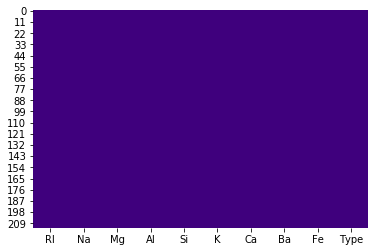

In [10]:
sns.heatmap(df.isnull(), cmap='Purples_r', cbar=False)

## 4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [12]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [3]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Type of glass:
* 1 buildingwindowsfloatprocessed 
* 2 buildingwindowsnonfloatprocessed 
* 3 vehiclewindowsfloatprocessed
* 4 vehiclewindowsnonfloatprocessed (none in this database)
* 5 containers
* 6 tableware
* 7 headlamps

## 5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ

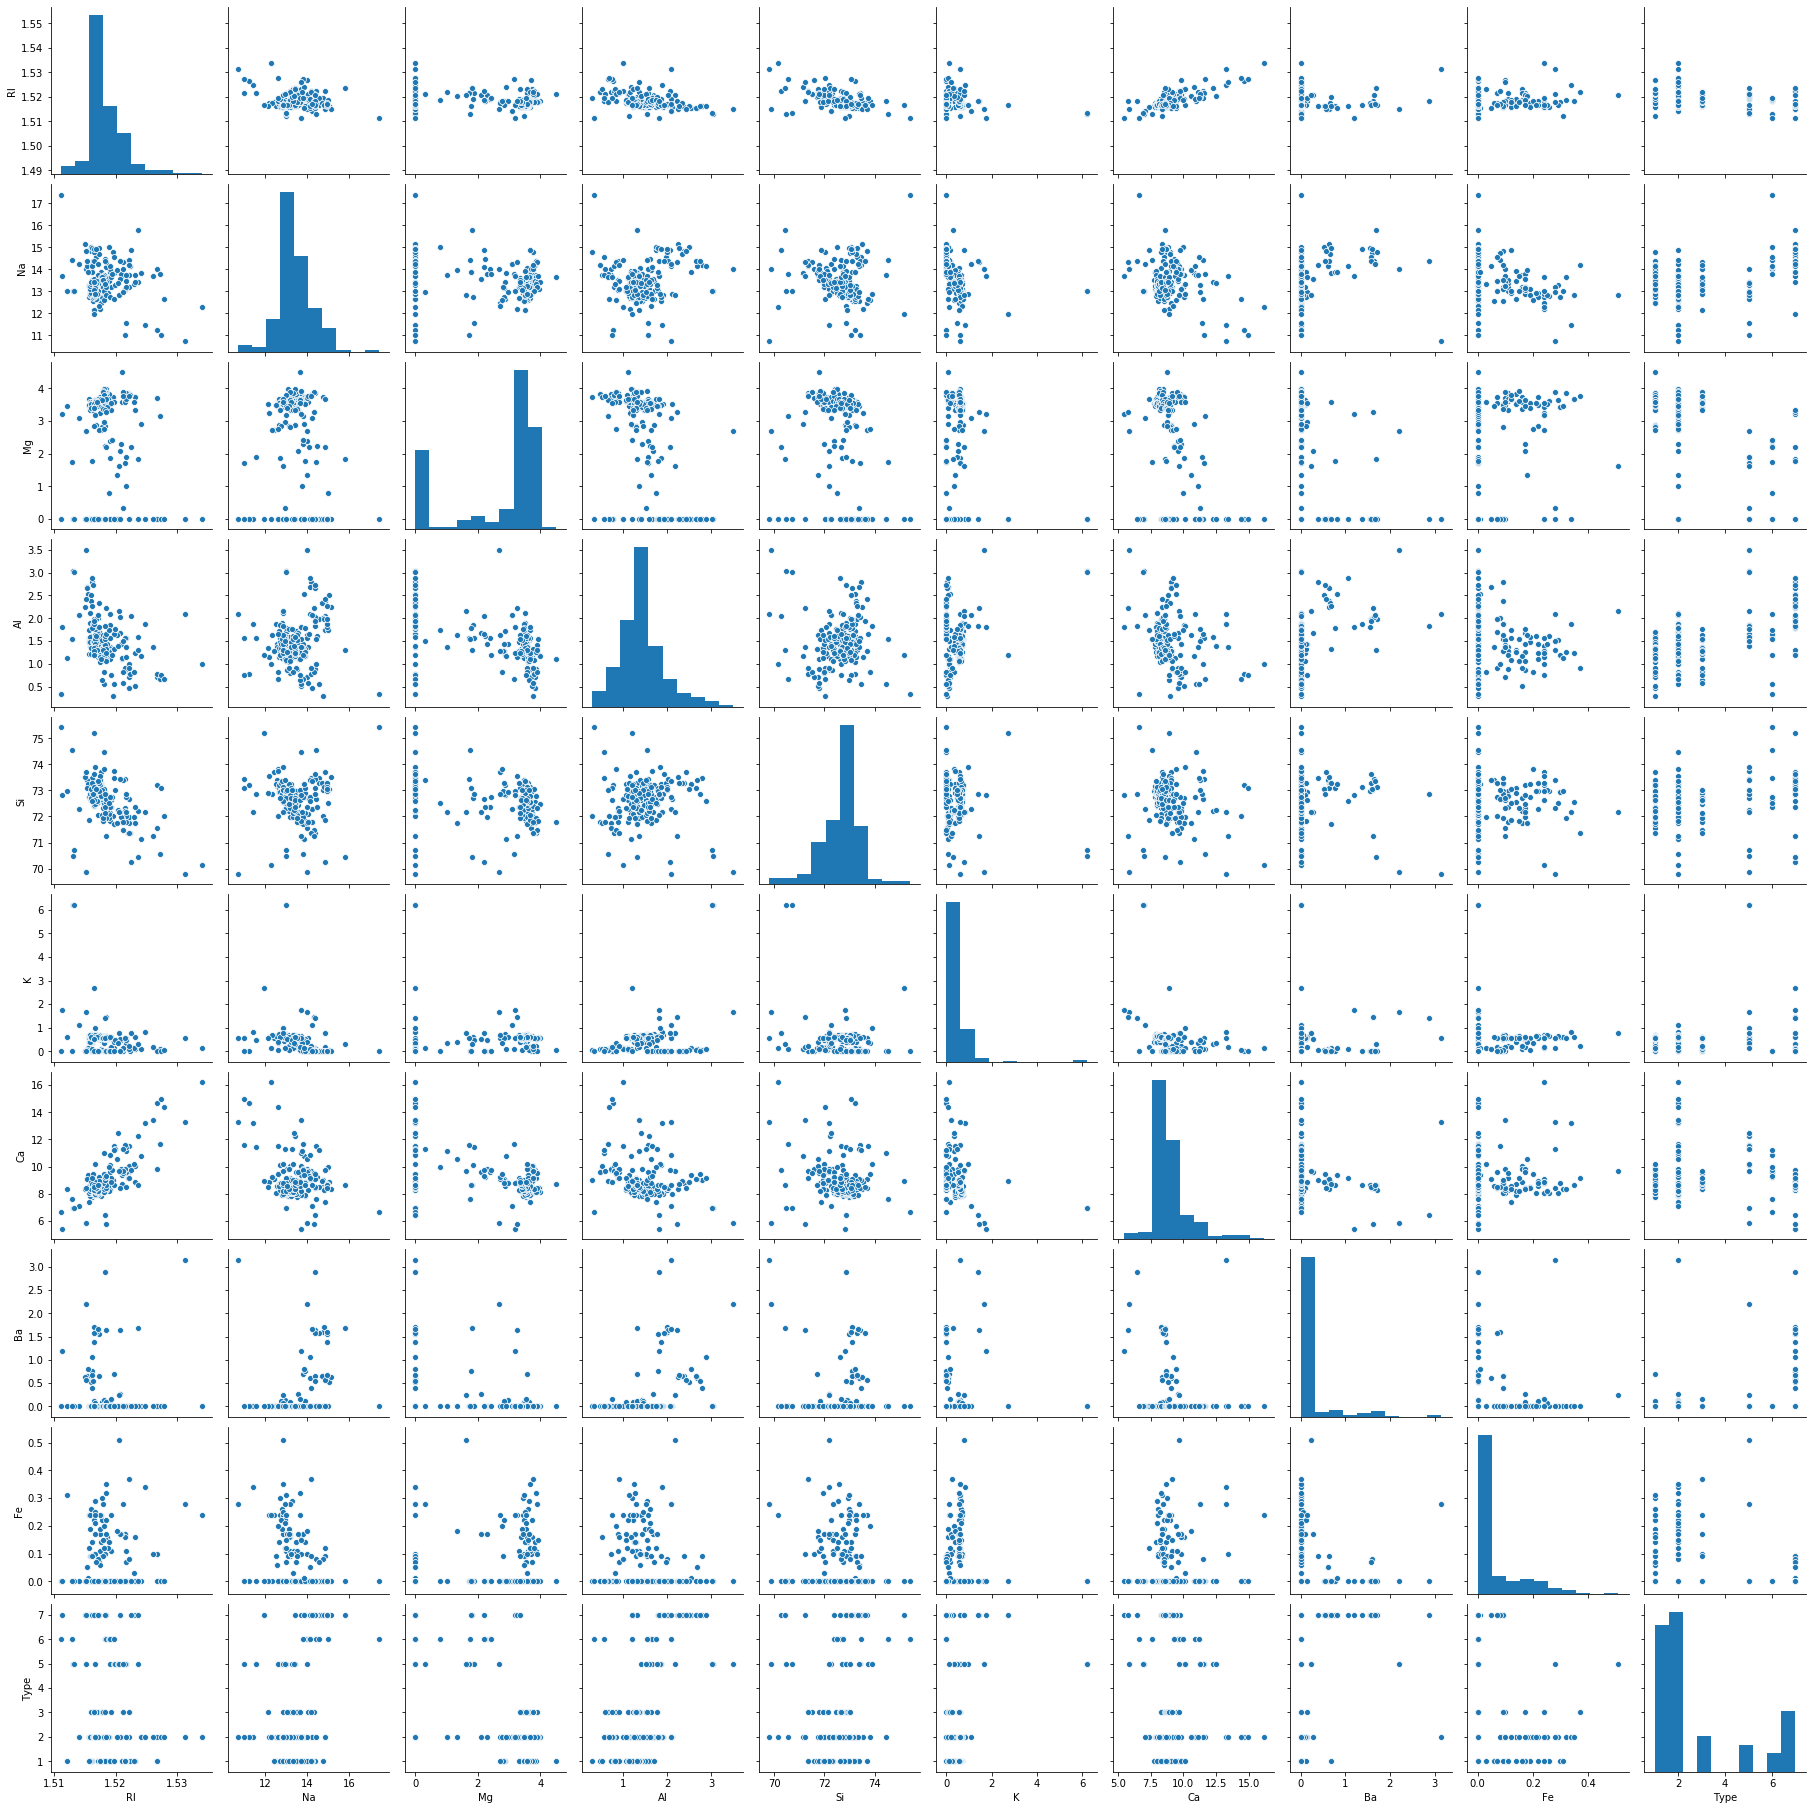

In [18]:
sns.pairplot(df)

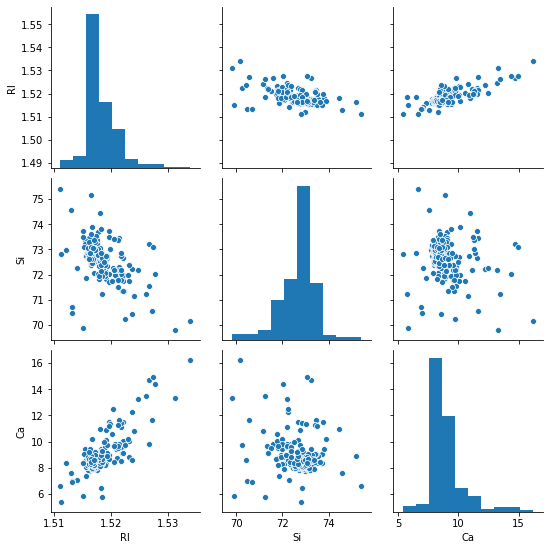

In [19]:
features = ['RI', 'Si', 'Ca']
sns.pairplot(df[features])

## 6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์

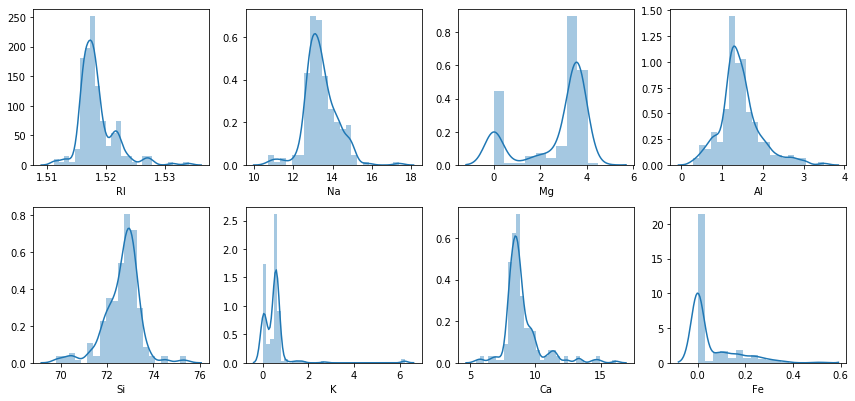

In [76]:
fig = plt.figure(figsize=(12,8))

i = 1
for col in df.columns :
    if (col != 'Type') and (col != 'Ba'):
        plt.subplot(3, 4, i)
        sns.distplot(df[col])
        #plt.hist(df[col], bins=20)
        plt.xlabel(col)
        i += 1
    
fig.tight_layout()

Note :  df['Ba'] ไม่สามารถทำ distplot ได้ จึงใช้ histogram

(array([185.,   5.,   8.,   2.,   4.,   7.,   1.,   0.,   0.,   2.]),
 array([0.   , 0.315, 0.63 , 0.945, 1.26 , 1.575, 1.89 , 2.205, 2.52 ,
        2.835, 3.15 ]),
 <a list of 10 Patch objects>)

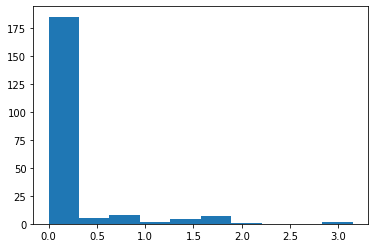

In [77]:
plt.hist(df['Ba'])

## 7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

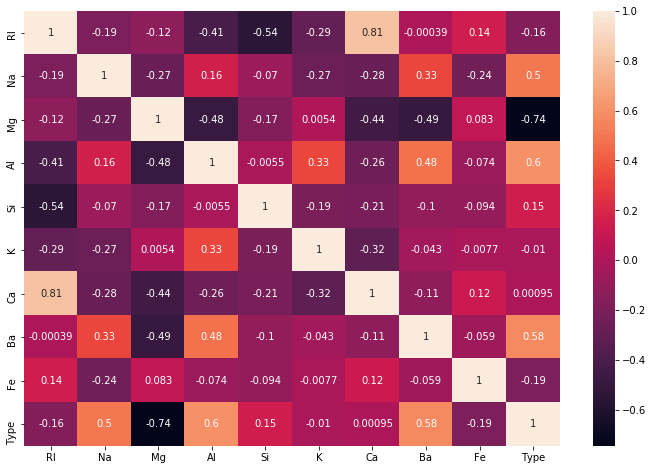

In [79]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

## 8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

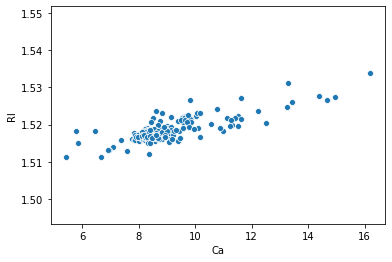

In [80]:
# most correlated pair : Ca and RI
sns.scatterplot(df['Ca'], df['RI'])

## 9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

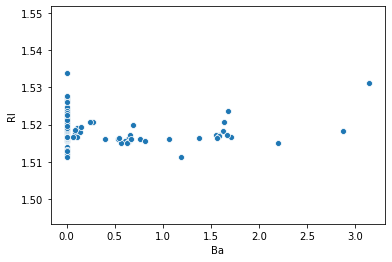

In [81]:
# least correlated pair : Ba and RI
sns.scatterplot(df['Ba'], df['RI'])

## 10. สร้าง histogram ของ feature ที่สนใจ

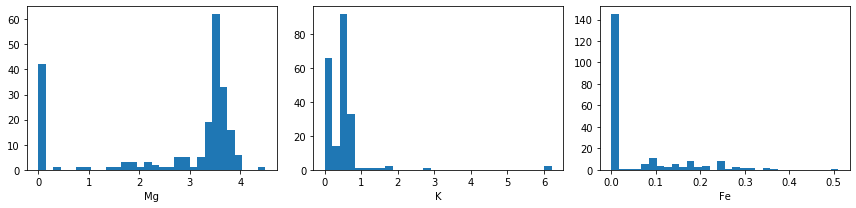

In [87]:
features = ['Mg', 'K', 'Fe']

fig = plt.figure(figsize=(12,3))
i = 1
for col in features:
    plt.subplot(1,3,i)
    plt.hist(df[col], bins=30)
    plt.xlabel(col)
    i+=1
fig.tight_layout()

Note :  
* Mg มีค่าส่วนมากเป็น ศูนย์ และประมาณ 3.5
* ค่า K ส่วนมากมีค่าประมาณ 0-1
* ค่า Fe ส่วนมากมีค่าเป็น 0

## 11. สร้าง box plot ของ features ที่สนใจ

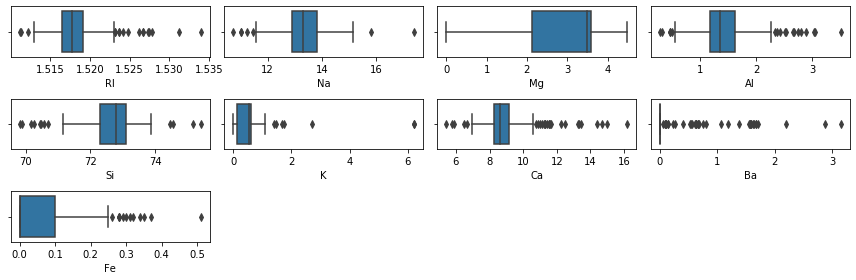

In [89]:
fig = plt.figure(figsize=(12,4))

i = 1
for col in df.columns :
    if (col != 'Type'):
        plt.subplot(3, 4, i)
        sns.boxplot(df[col])
        #plt.hist(df[col], bins=20)
        plt.xlabel(col)
        i += 1
    
fig.tight_layout()

## 12. สร้าง train/test split ของข้อมูล สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจ

In [5]:
# dependent and independent variables
X = df.drop(['Type'], axis=1).copy()
y = df['Type'].copy()

In [91]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [92]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (171, 9)
y_train shape :  (171,)
X_test shape :  (43, 9)
y_test shape :  (43,)


## 13. ทำ Data Visualization อื่นๆ (แล้วแต่เลือก)

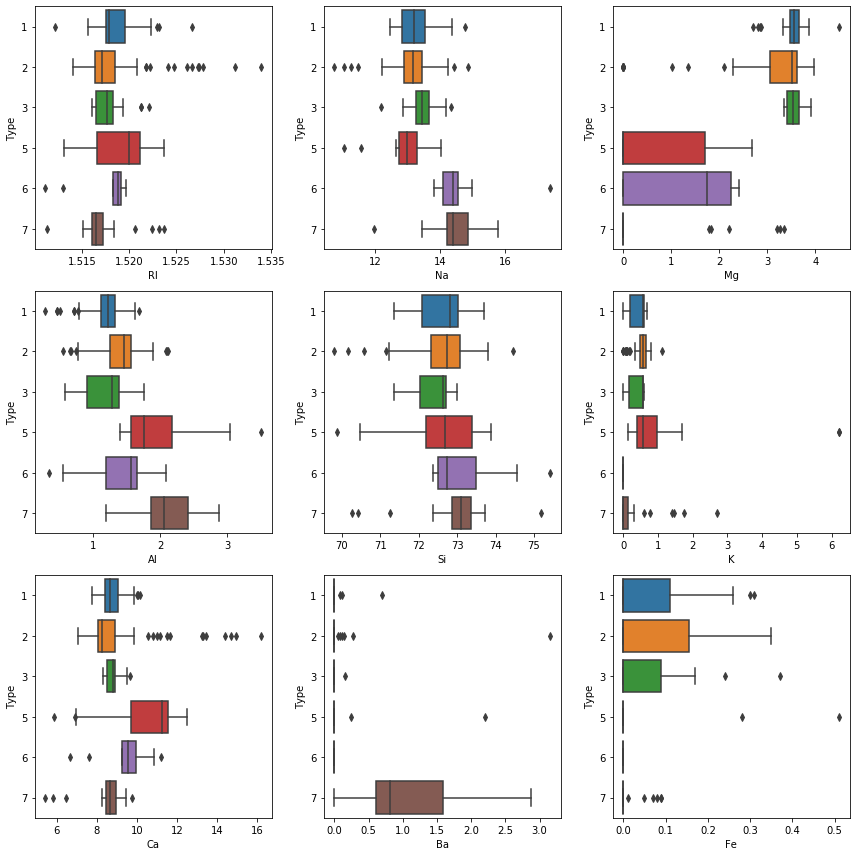

In [99]:
fig = plt.figure(figsize=(12,12))

i = 1
for col in df.columns :
    if (col != 'Type'):
        plt.subplot(3, 3, i)
        sns.boxplot(x=df[col], y=df['Type'], orient='h')
        #plt.hist(df[col], bins=20)
        plt.xlabel(col)
        i += 1
    
fig.tight_layout()

Note :  
* กระจกประเภทที่ 7 มีค่า Ba สูงกว่าประเภทอื่นๆ
* Mg สามารถจำแนกกระจกประเภทที่ 1,2,3 ออกจาก 5,6,7 ได้
* ที่ Fe มากกว่า 0 โดยมากจะเป็นกระจกประเภทที่ 1,2,3

## 14. พิจารณาว่าควรทำ Normalization หรือ Standardization หรือไม่ควรทั้งสองอย่าง พร้อมให้เหตุผล

Note :  
จาก distribution plot จะเห็นว่าไม่เป็น Normal distribution และมี skewness  
แต่หน่วยของข้อมูลแต่ละตัวมีความแตกต่างกันอยู่บ้าง จึงควรทำ Normalization เพื่อปรับให้ข้อมูลมีค่า 0-1

## 15. เลือกช้อยที่ดีที่สุดจากข้อ 14 (หรือจะทำทุกอันแล้วนำมาเปรียบเทียบก็ได้)

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [119]:
# default, All-features
# define model
clf1 = GaussianNB()
# fit model
clf1.fit(X_train, y_train)
# make prediction
y_pred1 = clf1.predict(X_test)
# model evaluation
acc1 = metrics.accuracy_score(y_test, y_pred1)
f11 = metrics.f1_score(y_test, y_pred1, average='micro')
precision1 = metrics.precision_score(y_test, y_pred1, average='micro')
recall1 = metrics.precision_score(y_test, y_pred1, average='micro')
# print results
print('Accuracy : ', acc1)
print('F1 score : ', f11)
print('Precision : ', precision1)
print('Recall : ', recall1)

Accuracy :  0.2558139534883721
F1 score :  0.2558139534883721
Precision :  0.2558139534883721
Recall :  0.2558139534883721


In [106]:
# Normalization
mm_sc = MinMaxScaler()
X_train_sc = mm_sc.fit_transform(X_train)
X_test_sc = mm_sc.transform(X_test)

In [110]:
X_train_sc[:3]

array([[0.95566502, 0.46698113, 0.92964824, 0.13084112, 0.30434783,
        0.00322061, 0.46065058, 0.        , 0.19607843],
       [0.24568966, 0.60220126, 0.        , 0.6635514 , 0.69384058,
        0.        , 0.31059811, 0.19444444, 0.        ],
       [0.37315271, 0.2908805 , 0.87437186, 0.32398754, 0.57065217,
        0.09017713, 0.31479538, 0.        , 0.        ]])

In [109]:
X_test_sc[:3]

array([[ 0.68165025,  0.53616352,  0.        ,  0.2211838 ,  0.50362319,
         0.01610306,  0.63903463,  0.        ,  0.15686275],
       [ 0.32635468,  0.6163522 ,  0.        ,  0.49221184,  0.58333333,
         0.        ,  0.33997901,  0.47916667,  0.        ],
       [ 1.23768473, -0.04559748,  0.        ,  0.56386293, -0.01449275,
         0.09339775,  0.82581322,  1.09375   ,  0.54901961]])

In [120]:
# Normalization, All-features
# define model
clf2 = GaussianNB()
# fit model
clf2.fit(X_train_sc, y_train)
# make prediction
y_pred2 = clf2.predict(X_test_sc)
# model evaluation
acc2 = metrics.accuracy_score(y_test, y_pred2)
f12 = metrics.f1_score(y_test, y_pred2, average='micro')
precision2 = metrics.precision_score(y_test, y_pred2, average='micro')
recall2 = metrics.precision_score(y_test, y_pred2, average='micro')
# print results
print('Accuracy : ', acc2)
print('F1 score : ', f12)
print('Precision : ', precision2)
print('Recall : ', recall2)

Accuracy :  0.2558139534883721
F1 score :  0.2558139534883721
Precision :  0.2558139534883721
Recall :  0.2558139534883721


Note :  
ทั้ง Default, All-features กับ Normalization, All-features ให้ผลลัพธ์ที่ไม่ค่อยน่าพอใจทั้งคู่

## 16. เลือกเฉพาะ features ที่สนใจมาเทรนโมเดล และวัดผลเปรียบเทียบกับแบบ all-features

In [130]:
#พิจารณา correlation ของ features ต่างๆ เทียบกับ y
X_train.corrwith(y_train).abs().sort_values(ascending=False)

Mg    0.765860
Ba    0.634065
Al    0.583615
Na    0.493550
Fe    0.203812
RI    0.138744
Si    0.130414
K     0.015332
Ca    0.010053
dtype: float64

In [138]:
# เลือก 3 features
features = X_train.corrwith(y_train).abs().sort_values(ascending=False).index[:3].values
print(features)

['Mg' 'Ba' 'Al']


In [139]:
# default, 3-features
# define model
clf3 = GaussianNB()
# fit model
clf3.fit(X_train[features], y_train)
# make prediction
y_pred3 = clf3.predict(X_test[features])
# model evaluation
acc3 = metrics.accuracy_score(y_test, y_pred3)
f13 = metrics.f1_score(y_test, y_pred3, average='micro')
precision3 = metrics.precision_score(y_test, y_pred3, average='micro')
recall3 = metrics.precision_score(y_test, y_pred3, average='micro')
# print results
print('Accuracy : ', acc3)
print('F1 score : ', f13)
print('Precision : ', precision3)
print('Recall : ', recall3)

Accuracy :  0.23255813953488372
F1 score :  0.23255813953488372
Precision :  0.23255813953488372
Recall :  0.23255813953488372


In [141]:
# Normalization, 3-features
mm_sc1 = MinMaxScaler()
X_train_sc1 = mm_sc1.fit_transform(X_train[features])
X_test_sc1 = mm_sc1.transform(X_test[features])

# define model
clf4 = GaussianNB()
# fit model
clf4.fit(X_train_sc1, y_train)
# make prediction
y_pred4 = clf4.predict(X_test_sc1)
# model evaluation
acc4 = metrics.accuracy_score(y_test, y_pred4)
f14 = metrics.f1_score(y_test, y_pred4, average='micro')
precision4 = metrics.precision_score(y_test, y_pred4, average='micro')
recall4 = metrics.precision_score(y_test, y_pred4, average='micro')
# print results
print('Accuracy : ', acc4)
print('F1 score : ', f14)
print('Precision : ', precision4)
print('Recall : ', recall4)

Accuracy :  0.23255813953488372
F1 score :  0.23255813953488372
Precision :  0.23255813953488372
Recall :  0.23255813953488372


## 17. ทำ Visualization ของค่า F1 Score ระหว่าง ผลลัพธ์ของ Normalization, Standardization ทั้งแบบก่อนและหลังการแบ่งข้อมูล

In [143]:
# Normalization ก่อนแบ่งข้อมูล, All-Features
mm_sc2 = MinMaxScaler()
X_sc2 = mm_sc2.fit_transform(X)
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sc2, y, test_size=0.2, random_state=1)
# define model, fit and make prediction
clf5 = GaussianNB()
clf5.fit(X_train, y_train)
y_pred5 = clf5.predict(X_test)
# model evaluation
acc5 = metrics.accuracy_score(y_test, y_pred5)
f15 = metrics.f1_score(y_test, y_pred5, average='micro')
precision5 = metrics.precision_score(y_test, y_pred5, average='micro')
recall5 = metrics.precision_score(y_test, y_pred5, average='micro')
# print results
print('Accuracy : ', acc5)
print('F1 score : ', f15)
print('Precision : ', precision5)
print('Recall : ', recall5)

Accuracy :  0.2558139534883721
F1 score :  0.2558139534883721
Precision :  0.2558139534883721
Recall :  0.2558139534883721


In [144]:
# Normalization หลังแบ่งข้อมูล, All-Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
mm_sc3 = MinMaxScaler()
X_train = mm_sc3.fit_transform(X_train)
mm_sc4 = MinMaxScaler()
X_test = mm_sc4.fit_transform(X_test)
# define model, fit and make prediction
clf6 = GaussianNB()
clf6.fit(X_train, y_train)
y_pred6 = clf6.predict(X_test)
# model evaluation
acc6 = metrics.accuracy_score(y_test, y_pred6)
f16 = metrics.f1_score(y_test, y_pred6, average='micro')
precision6 = metrics.precision_score(y_test, y_pred6, average='micro')
recall6 = metrics.precision_score(y_test, y_pred6, average='micro')
# print results
print('Accuracy : ', acc6)
print('F1 score : ', f16)
print('Precision : ', precision6)
print('Recall : ', recall6)

Accuracy :  0.11627906976744186
F1 score :  0.11627906976744186
Precision :  0.11627906976744186
Recall :  0.11627906976744186


In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
# Standardization ก่อนแบ่งข้อมูล, All-Features
std_sc1 = StandardScaler()
X_sc3 = std_sc1.fit_transform(X)
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sc3, y, test_size=0.2, random_state=1)
# define model, fit and make prediction
clf7 = GaussianNB()
clf7.fit(X_train, y_train)
y_pred7 = clf7.predict(X_test)
# model evaluation
acc7 = metrics.accuracy_score(y_test, y_pred7)
f17 = metrics.f1_score(y_test, y_pred7, average='micro')
precision7 = metrics.precision_score(y_test, y_pred7, average='micro')
recall7 = metrics.precision_score(y_test, y_pred7, average='micro')
# print results
print('Accuracy : ', acc7)
print('F1 score : ', f17)
print('Precision : ', precision7)
print('Recall : ', recall7)

Accuracy :  0.2558139534883721
F1 score :  0.2558139534883721
Precision :  0.2558139534883721
Recall :  0.2558139534883721


In [147]:
# Standardization หลังแบ่งข้อมูล, All-Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
std_sc2 = StandardScaler()
X_train = std_sc2.fit_transform(X_train)
std_sc3 = StandardScaler()
X_test = std_sc3.fit_transform(X_test)
# define model, fit and make prediction
clf8 = GaussianNB()
clf8.fit(X_train, y_train)
y_pred8 = clf8.predict(X_test)
# model evaluation
acc8 = metrics.accuracy_score(y_test, y_pred8)
f18 = metrics.f1_score(y_test, y_pred8, average='micro')
precision8 = metrics.precision_score(y_test, y_pred8, average='micro')
recall8 = metrics.precision_score(y_test, y_pred8, average='micro')
# print results
print('Accuracy : ', acc8)
print('F1 score : ', f18)
print('Precision : ', precision8)
print('Recall : ', recall8)

Accuracy :  0.5813953488372093
F1 score :  0.5813953488372093
Precision :  0.5813953488372093
Recall :  0.5813953488372093


In [152]:
model = ['Norm_before_split', 'Norm_after_split', 'Std_before_split', 'Std_after_split']
f1_scores = [f15, f16, f17, f18]

# create eval_df dataframe
eval_df = pd.DataFrame(np.array([f1_scores]),columns=model, index=['f1'])
eval_df

,Norm_before_split,Norm_after_split,Std_before_split,Std_after_split
f1,0.255814,0.116279,0.255814,0.581395


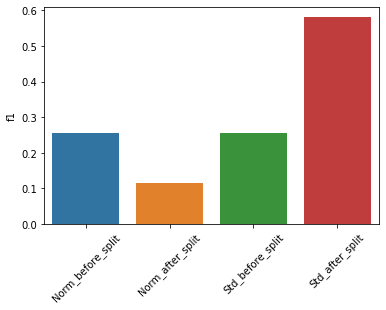

In [160]:
sns.barplot(x=eval_df.columns, y=eval_df.loc['f1'])
plt.xticks(rotation=45)
plt.show()

## 18. สามารถใช้เทคนิคใดก็ได้ตามที่สอนมา ใช้ Naïve Bayesแล้วให้ผลลัพธ์ที่ดีที่สุดที่เป็นไปได้ (ลองปรับ Parameter?)

In [175]:
print(X.corrwith(y).abs().sort_values(ascending=False))

Mg    0.744993
Al    0.598829
Ba    0.575161
Na    0.502898
Fe    0.188278
RI    0.164237
Si    0.151565
K     0.010054
Ca    0.000952
dtype: float64


In [273]:
# Standardization after split : fit_transform(X_train) and transform(X_test)
# 2-features + parameter tuning
features = ['Mg','Al']

X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size = 0.2, random_state=1)
std_sc4 = StandardScaler()
X_train = std_sc4.fit_transform(X_train)
X_test = std_sc4.transform(X_test)

clf9 = GaussianNB(var_smoothing=0.5)
clf9.fit(X_train, y_train)

y_pred9 = clf9.predict(X_test)

acc9 = metrics.accuracy_score(y_test, y_pred9)
f19 = metrics.f1_score(y_test, y_pred9, average='micro')
precision9 = metrics.precision_score(y_test, y_pred9, average='micro')
recall9 = metrics.recall_score(y_test, y_pred9, average='micro')
print('Accuracy : ', acc9)
print('F1 score : ', f19)
print('Precision : ', precision9)
print('Recall : ', recall9)

Accuracy :  0.7209302325581395
F1 score :  0.7209302325581395
Precision :  0.7209302325581395
Recall :  0.7209302325581395


In [274]:
temp = pd.Series(data=[f19], index=['f1'], name='Std_after_2features')
temp

f1    0.72093
Name: Std_after_2features, dtype: float64

In [275]:
eval_df = pd.concat([eval_df, temp], axis=1)
eval_df

,Norm_before_split,Norm_after_split,Std_before_split,Std_after_split,Std_after_2features
f1,0.255814,0.116279,0.255814,0.581395,0.72093


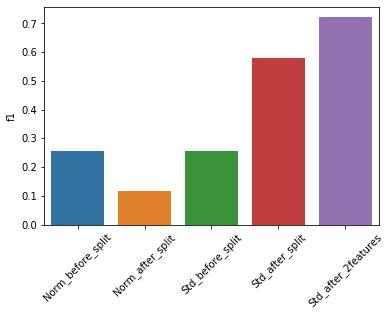

In [276]:
sns.barplot(x=eval_df.columns, y=eval_df.loc['f1'])
plt.xticks(rotation=45)
plt.show()

In [282]:
# Normalization after split : fit_transform(X_train) and transform(X_test)
# 2-features + parameter tuning
features = ['Mg','Al']

X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size = 0.2, random_state=1)
mm_sc5 = MinMaxScaler()
X_train = mm_sc5.fit_transform(X_train)
X_test = mm_sc5.transform(X_test)

clf10 = GaussianNB(var_smoothing=0.5)
clf10.fit(X_train, y_train)

y_pred10 = clf10.predict(X_test)

acc10 = metrics.accuracy_score(y_test, y_pred10)
f110 = metrics.f1_score(y_test, y_pred10, average='micro')
precision10 = metrics.precision_score(y_test, y_pred10, average='micro')
recall10 = metrics.recall_score(y_test, y_pred10, average='micro')
print('Accuracy : ', acc10)
print('F1 score : ', f110)
print('Precision : ', precision10)
print('Recall : ', recall10)

Accuracy :  0.5813953488372093
F1 score :  0.5813953488372093
Precision :  0.5813953488372093
Recall :  0.5813953488372093


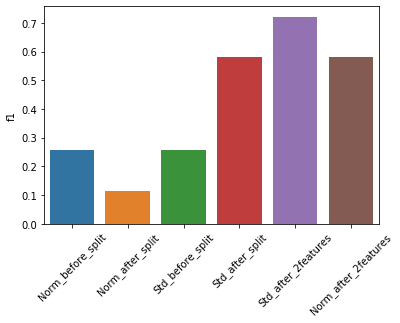

In [283]:
temp = pd.Series(data=[f110], index=['f1'], name='Norm_after_2features')
eval_df = pd.concat([eval_df, temp], axis=1)

sns.barplot(x=eval_df.columns, y=eval_df.loc['f1'])
plt.xticks(rotation=45)
plt.show()

### Note :
ดูเหมือนว่า Naive Bayes จะให้ผลลัพธ์ที่ไม่ดีพอสำหรับ dataset นี้  
อาจเพราะเนื่องจากการที่ข้อมูลไม่เป็น Normal distribution (มี skewness มาก)  
ลองใช้โมเดลอื่น เช่น Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

RF = RandomForestClassifier(random_state=10)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='micro')
precision = metrics.precision_score(y_test, y_pred, average='micro')
recall = metrics.recall_score(y_test, y_pred, average='micro')
print('Accuracy : ', acc)
print('F1 score : ', f1)
print('Precision : ', precision)
print('Recall : ', recall)

Accuracy :  0.7441860465116279
F1 score :  0.7441860465116278
Precision :  0.7441860465116279
Recall :  0.7441860465116279


Note :  
ได้ผลลัพธ์ที่ดีขึ้น โดยที่ยังไม่มีการปรับค่าใดๆ

### Note :  
ลองใช้ data transformation อื่นที่เหมาะกับข้อมูลที่มี skewness

In [39]:
from sklearn.preprocessing import PowerTransformer

In [38]:
# ตรวจสอบว่ามีค่าใดใน X ที่น้อยกว่า 0 หรือไม่ 
# ถ้าไม่มี สามารถใช้ Transformation ได้ทั้ง BoxCox และ Yeo-Johnson
(X<0).sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

transformer = PowerTransformer(method='box-cox')
X_train = transformer.fit_transform(X_train+1)
X_test = transformer.transform(X_test+1)

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='micro')
precision = metrics.precision_score(y_test, y_pred, average='micro')
recall = metrics.recall_score(y_test, y_pred, average='micro')
print('Accuracy : ', acc)
print('F1 score : ', f1)
print('Precision : ', precision)
print('Recall : ', recall)

Accuracy :  0.27906976744186046
F1 score :  0.27906976744186046
Precision :  0.27906976744186046
Recall :  0.27906976744186046


/home/samantha/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)


Note :  
ใช้ box-cox transformation แล้ว แต่ Naive Bayes ก็ยังให้ผลไม่ดีเท่าไหร่

สรุป dataset นี้ อาจเหมาะกับโมเดลอื่นมากกว่า

In [81]:
# ลอง box-cox transformation กับ Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

transformer = PowerTransformer(method='box-cox')
X_train = transformer.fit_transform(X_train+1)
X_test = transformer.transform(X_test+1)

RF = RandomForestClassifier(random_state=10)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='micro')
precision = metrics.precision_score(y_test, y_pred, average='micro')
recall = metrics.recall_score(y_test, y_pred, average='micro')
print('Accuracy : ', acc)
print('F1 score : ', f1)
print('Precision : ', precision)
print('Recall : ', recall)

/home/samantha/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)


Accuracy :  0.7209302325581395
F1 score :  0.7209302325581395
Precision :  0.7209302325581395
Recall :  0.7209302325581395


Note : ประสิทธิภาพโมเดลลดลงเล็กน้อย จาก Random Forest ที่ X ไม่ถูก transform